In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


Queremos treinar um modelo para dizer se o carro vai ser vendido ou nao

In [2]:
# Pior situação (azar) onde as classes estão ordenadas por padrão
dados_azar = dados.sort_values("vendido", ascending= True)
x_azar = dados_azar[['preco', 'idade_do_modelo', 'km_por_ano']]
y_azar = dados_azar['vendido']
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [3]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

ic1 = (media - 2 * desvio_padrao) * 100
ic2 = (media + 2 * desvio_padrao) * 100

print('Accuracy com dummy stratified, 10 = [{:.2f} , {:.2f}]'.format(ic1, ic2))

Accuracy com dummy stratified, 10 = [58.00 , 58.00]


In [4]:
# rodando a mesma coisa com o decisiontree classifier (também é um baseline)
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

ic1 = (media - 2 * desvio_padrao) * 100
ic2 = (media + 2 * desvio_padrao) * 100

print('Accuracy com dummy stratified, 10 = [{:.2f} , {:.2f}]'.format(ic1, ic2))

Accuracy com dummy stratified, 10 = [73.83 , 77.73]


In [5]:
# Gerando relatórios de modelo de carro para simulação de agrupamento ao uasr o estimador
SEED = 301
np.random.seed(SEED)

dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2,3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [6]:
def imprime_resultados(results):
    media = results['test_score'].mean() * 100
    desvio_padrao = results['test_score'].std() * 100
    print('Accuracy médio {:.2f}'.format(media))

    ic1 = (media - 2 * desvio_padrao) 
    ic2 = (media + 2 * desvio_padrao) 

    print('Intervalo [{:.2f} , {:.2f}]'.format(ic1, ic2))

In [7]:
# groupkfold para analiasr como o modelo se comporta com novos grupos
# validação cruzada que agrupa pelo modelo do carro
from sklearn.model_selection import GroupKFold
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups=dados.modelo, return_train_score=False)

imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67 , 77.90]


In [8]:
# Usando o SVC invés do decisiontree
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()
Pipeline = Pipeline([('transformacao', scaler), ('estimador', modelo)])

cv = GroupKFold(n_splits=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups=dados.modelo, return_train_score=False)# 
imprime_resultados(results)

Accuracy médio 77.27
Intervalo [74.35 , 80.20]


In [9]:
# vou usar o modelo decisiontree

from sklearn.model_selection import GroupKFold
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups=dados.modelo, return_train_score=False)

imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67 , 77.90]


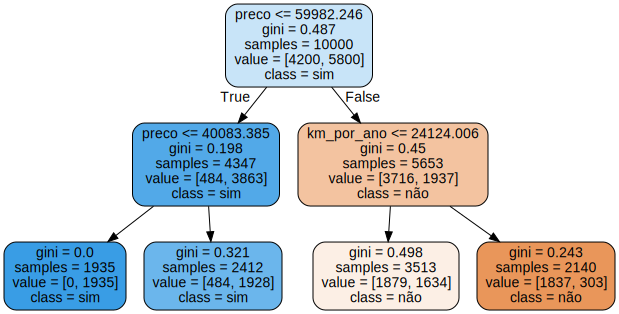

In [10]:
# visualizando a árvore
import graphviz
from sklearn.tree import export_graphviz

modelo.fit(x_azar, y_azar)

dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=["não", "sim"], feature_names= x_azar.columns)

graph = graphviz.Source(dot_data)
graph


In [11]:
# com max_depth 3

from sklearn.model_selection import GroupKFold
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups=dados.modelo, return_train_score=False)

imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40 , 80.94]


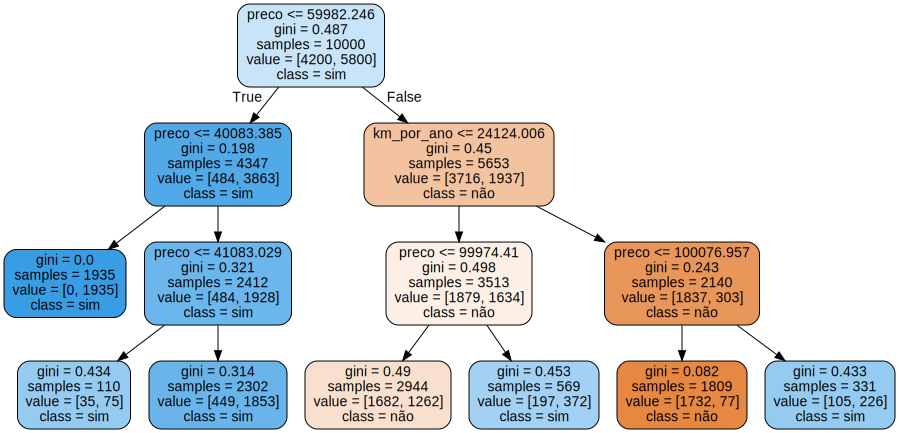

In [12]:
# visualizando a árvore
import graphviz
from sklearn.tree import export_graphviz

modelo.fit(x_azar, y_azar)

dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=["não", "sim"], feature_names= x_azar.columns)

graph = graphviz.Source(dot_data)
graph

# Explorando hiper parâmetros em uma dimensão

In [13]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, treino = %.2f, teste = %.2f" % (max_depth, train_score, test_score))
  tabela = [max_depth, train_score, test_score]
  return tabela
  
resultados = [roda_arvore_de_decisao(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns= ["max_depth","train","test"])
resultados.head()

Arvore max_depth = 1, treino = 75.79, teste = 75.78
Arvore max_depth = 2, treino = 75.79, teste = 75.78
Arvore max_depth = 3, treino = 78.75, teste = 78.67
Arvore max_depth = 4, treino = 78.79, teste = 78.63
Arvore max_depth = 5, treino = 78.94, teste = 78.56
Arvore max_depth = 6, treino = 79.17, teste = 78.12
Arvore max_depth = 7, treino = 79.50, teste = 77.96
Arvore max_depth = 8, treino = 79.89, teste = 77.86
Arvore max_depth = 9, treino = 80.46, teste = 77.38
Arvore max_depth = 10, treino = 81.16, teste = 77.19
Arvore max_depth = 11, treino = 82.03, teste = 76.97
Arvore max_depth = 12, treino = 82.89, teste = 76.49
Arvore max_depth = 13, treino = 83.95, teste = 75.81
Arvore max_depth = 14, treino = 85.03, teste = 75.66
Arvore max_depth = 15, treino = 86.14, teste = 75.16
Arvore max_depth = 16, treino = 87.19, teste = 75.11
Arvore max_depth = 17, treino = 88.31, teste = 74.74
Arvore max_depth = 18, treino = 89.26, teste = 74.33
Arvore max_depth = 19, treino = 90.32, teste = 74.34
Ar

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


<AxesSubplot:xlabel='max_depth', ylabel='train'>

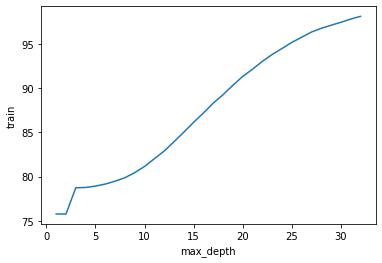

In [14]:
import seaborn as sns

sns.lineplot(x = "max_depth", y = "train", data = resultados)

# OVERFIT: ficou "perfeito" para o treino mas ruim para o teste

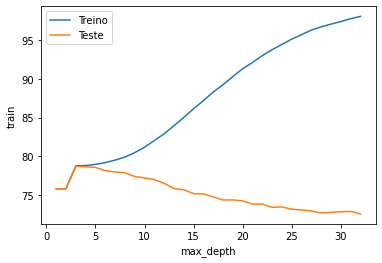

In [15]:
import matplotlib.pyplot as plt

sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["Treino", "Teste"])

In [16]:
resultados.sort_values("test", ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


# Explorando hiper parâmetros em 2 dimensões

In [17]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 32, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 64, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 32, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 64, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.78
Arvore max_depth = 3, min_samples_leaf = 32, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 64, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 32, treino = 78.75, teste = 78.67
Arvore max_depth = 

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [18]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


# Explorando 3 dimensões de hiperparâmetros


In [19]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  #print("Arvore max_depth = %d, min_samples_leaf = %d, min_samples_split = %d treino = %.2f, teste = %.2f" % (max_depth, min_samples_leaf,min_samples_split, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","min_samples_split", "train","test", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()


,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.003501,0.0008
1,1,32,64,75.791169,75.784219,0.003601,0.0009
2,1,32,128,75.791169,75.784219,0.003301,0.0008
3,1,32,256,75.791169,75.784219,0.003401,0.0009
4,1,64,32,75.791169,75.784219,0.003701,0.0009


In [20]:
corr = resultados.corr()

<AxesSubplot:>

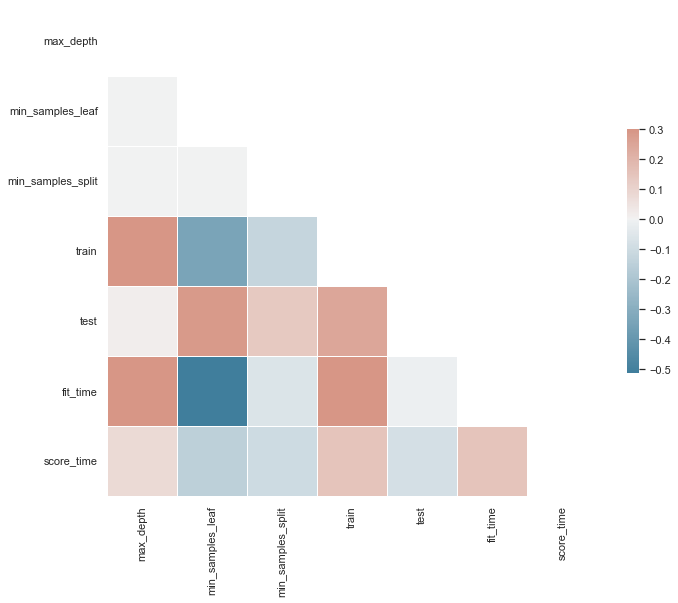

In [21]:
sns.set(style = "white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Explorando espaço de hiper parâmetros com GridSearchCV
### O GridSearch otimizia e encontra o melhor conjunto de hiperparâmetros


In [22]:
from sklearn.model_selection import GridSearchCV
SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth": [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(), espaco_de_parametros, cv = GroupKFold(n_splits=10))
busca.fit(x_azar, y_azar, groups = dados.modelo)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007102,0.00030,0.001101,0.000300,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.006601,0.00049,0.000800,0.000400,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.006802,0.00040,0.000900,0.000300,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.006801,0.00040,0.000900,0.000300,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.006801,0.00040,0.000700,0.000458,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [23]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [24]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [25]:
from sklearn.metrics import accuracy_score

# Evitar essa abordagem pois está sendo otimista e não realista
predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100
print('Accuracy: {:.2f}%'.format(accuracy))

Accuracy: 78.75%


# Como ter uma estimativa real nos dados sem o vício nos dados que eu já vi?


No caso de cross validation cmo busca de hiper parâmetros, fazemos uma nova validação cruzada. Chama-se Nested cross validation



In [26]:
from sklearn.model_selection import cross_val_score

cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits=10), groups=dados.modelo)

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

# Como o pandas nao suporta o nested validation com o group k fold não conseguimos prever o resultado para novos grupos

In [27]:
from sklearn.model_selection import GridSearchCV, KFold
SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth": [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(), espaco_de_parametros, cv = KFold(n_splits=5, shuffle= True))
busca.fit(x_azar, y_azar, groups = dados.modelo)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006801,0.00040,0.001401,4.898627e-04,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.006401,0.00049,0.001001,4.862804e-07,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.006601,0.00049,0.000801,4.003764e-04,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.006600,0.00049,0.000801,4.005194e-04,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.006200,0.00040,0.000801,4.004004e-04,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True), groups=dados.modelo)
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [29]:
def imprime_score(scores):
    media = scores.mean() * 100
    desvio_padrao = scores.std() * 100
    print('Accuracy médio {:.2f}'.format(media))

    ic1 = (media - 2 * desvio_padrao) 
    ic2 = (media + 2 * desvio_padrao) 

    print('Intervalo [{:.2f} , {:.2f}]'.format(ic1, ic2))

In [30]:
imprime_score(scores)

Accuracy médio 78.67
Intervalo [76.80 , 80.54]


In [31]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

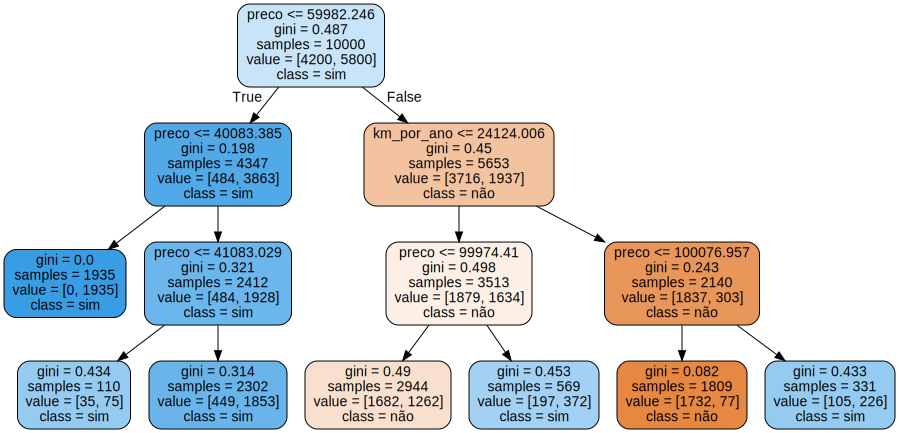

In [32]:
# visualizando a árvore
import graphviz
from sklearn.tree import export_graphviz

features = x_azar.columns


dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True, class_names=["não", "sim"], feature_names= features)

graph = graphviz.Source(dot_data)
graph



Fizemos um primeiro processo de otimização de modelos. O SKlearn dá o nome Model Selection para esse processo de validação e otimização de hiperparâmetros

# Parte 2 - Exploração aleatória

In [33]:
from sklearn.model_selection import RandomizedSearchCV, KFold
SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth": [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(), espaco_de_parametros, n_iter = 16, cv = KFold(n_splits=5, shuffle=True), random_state=SEED)
busca.fit(x_azar, y_azar)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009002,6.324097e-04,0.000800,4.000903e-04,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.784,0.769,0.7985,0.793,0.7730,0.7835,0.011278,13
1,0.006401,4.901351e-04,0.001000,3.234067e-07,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.776,0.8025,0.793,0.7795,0.7870,0.009618,1
2,0.006401,4.903102e-04,0.001001,2.611745e-07,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.776,0.8025,0.793,0.7795,0.7870,0.009618,1
3,0.012003,1.168008e-07,0.001000,3.504023e-07,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.784,0.769,0.8005,0.793,0.7730,0.7839,0.011825,7
4,0.011602,4.901157e-04,0.001000,2.780415e-07,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.769,0.8005,0.793,0.7730,0.7839,0.011825,7


In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True), groups=dados.modelo)
scores

array([0.7825, 0.783 , 0.794 , 0.781 , 0.795 ])

In [35]:
imprime_score(scores)

Accuracy médio 78.71
Intervalo [77.49 , 79.93]


In [36]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=64)

# Customizando o espaço de hiperparâmetros

In [37]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint
SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth": [3, 5, 10, 15, 20, 30, None],
    "min_samples_split": randint(32, 128),
    "min_samples_leaf": randint(32, 128),
    "criterion": ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(), espaco_de_parametros, n_iter = 16, cv = KFold(n_splits=5, shuffle=True), random_state=SEED)
busca.fit(x_azar, y_azar)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008402,0.000490,0.001200,3.998283e-04,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7840,0.7760,0.8025,0.7930,0.7795,0.7870,0.009618,1
1,0.011402,0.000490,0.001201,4.004719e-04,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7740,0.7725,0.7830,0.7805,0.7725,0.7765,0.004393,14
2,0.010403,0.000490,0.001000,7.168434e-07,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7705,0.7745,0.7990,0.7790,0.7735,0.7793,0.010221,8
3,0.013803,0.000749,0.001200,3.998520e-04,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.7575,0.7730,0.7725,0.7835,0.7560,0.7685,0.010378,16
4,0.010402,0.000490,0.001000,2.611745e-07,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7705,0.7735,0.7995,0.7790,0.7745,0.7794,0.010413,7


In [38]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True), groups=dados.modelo)
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Accuracy médio 78.71
Intervalo [77.49 , 79.93]
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


In [39]:
# Maneira mais adequada de imprimir os resultados da tabela resultados
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending = False)

for indice, linha in resultados_ordenados_pela_media.iterrows():
    print('{:.3f} +- {:.3f}'.format(linha.mean_test_score, linha.std_test_score*2), linha.params)


0.787 +- 0.019 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.784 +- 0.024 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.784 +- 0.024 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.781 +- 0.017 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 108, 'min_samples_split': 110}
0.780 +- 0.019 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 125, 'min_samples_split': 59}
0.780 +- 0.012 {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 103, 'min_samples_split': 96}
0.779 +- 0.021 {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 126, 'min_samples_split': 84}
0.779 +- 0.020 {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 124, 'min_samples_split': 88}
0.779 +- 0.009 {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 101, 'min_samples_split': 52}
0.779 +- 0.014 {'criterion': 'entropy', 'max_depth': 15, 'mi

# Exploração mais detalhada de forma aleatória n° iterações (16 -> 64)

In [40]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint
SEED = 54
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth": [3, 5, 10, 15, 20, 30, None],
    "min_samples_split": randint(32, 128),
    "min_samples_leaf": randint(32, 128),
    "criterion": ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(), espaco_de_parametros, n_iter = 64, cv = KFold(n_splits=5, shuffle=True), random_state=SEED)
busca.fit(x_azar, y_azar)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021605,1.625617e-03,0.001400,4.901741e-04,entropy,30,34,47,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.7830,0.7565,0.7640,0.7820,0.7605,0.7692,0.011120,63
1,0.011003,2.611745e-07,0.001200,4.001619e-04,entropy,5,96,88,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.7915,0.7765,0.7860,0.7890,0.7920,0.7870,0.005666,5
2,0.012402,4.899211e-04,0.001001,7.539457e-07,entropy,5,41,38,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.7900,0.7745,0.7860,0.7890,0.7920,0.7863,0.006210,16
3,0.016804,7.490292e-04,0.001000,3.814697e-07,entropy,20,84,45,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.7905,0.7670,0.7835,0.7870,0.7765,0.7809,0.008351,31
4,0.011203,3.999234e-04,0.001000,4.156970e-07,gini,None,116,94,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.7920,0.7725,0.7730,0.7885,0.7765,0.7805,0.008155,34


In [41]:
# Maneira mais adequada de imprimir os resultados da tabela resultados
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending = False)

for indice, linha in resultados_ordenados_pela_media.iterrows():
    print('{:.3f} +- {:.3f}'.format(linha.mean_test_score, linha.std_test_score*2), linha.params)

0.787 +- 0.010 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 79, 'min_samples_split': 78}
0.787 +- 0.010 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 79, 'min_samples_split': 95}
0.787 +- 0.009 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 53, 'min_samples_split': 116}
0.787 +- 0.009 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 48, 'min_samples_split': 98}
0.787 +- 0.011 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 127, 'min_samples_split': 117}
0.787 +- 0.011 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 78, 'min_samples_split': 88}
0.787 +- 0.011 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 106, 'min_samples_split': 50}
0.787 +- 0.011 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 52, 'min_samples_split': 38}
0.787 +- 0.011 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 99, 'min_samples_split': 77}
0.787 +- 0.011 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_

In [42]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True), groups=dados.modelo)
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Accuracy médio 78.71
Intervalo [77.58 , 79.84]
DecisionTreeClassifier(max_depth=5, min_samples_leaf=79, min_samples_split=78)


# Comparando GridSearchCV com RandomizedSearch

In [43]:
from sklearn.ensemble import RandomForestClassifier
import time
SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators": [10, 100],
    "max_depth": [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

tic = time.time()
busca = GridSearchCV(RandomForestClassifier(), espaco_de_parametros, cv = KFold(n_splits=5, shuffle= True))
busca.fit(x_azar, y_azar, groups = dados.modelo)
tac = time.time()
delay = tac - tic
print('Tempo {:.2f} segundos'.format(delay))
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 133.47 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024006,0.001095,0.002800,0.000400,True,gini,3,32,32,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7560,0.7490,0.7850,0.7450,0.7619,0.015357,130
1,0.225251,0.002482,0.014804,0.000400,True,gini,3,32,32,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7655,0.7555,0.7945,0.7850,0.7625,0.7726,0.014685,93
2,0.025005,0.001674,0.002400,0.000490,True,gini,3,32,64,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7780,0.7635,0.7835,0.7845,0.7560,0.7731,0.011373,89
3,0.222050,0.003407,0.015203,0.000748,True,gini,3,32,64,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7425,0.7550,0.7950,0.7850,0.7620,0.7679,0.019356,119
4,0.023605,0.000800,0.002801,0.000400,True,gini,3,32,128,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7755,0.7405,0.7485,0.7760,0.7630,0.7607,0.014250,135


In [44]:
# Maneira mais adequada de imprimir os resultados da tabela resultados
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending = False)

for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
    print('{:.3f} +- {:.3f}'.format(linha.mean_test_score, linha.std_test_score*2), linha.params)

0.780 +- 0.020 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +- 0.020 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 10}
0.778 +- 0.030 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +- 0.027 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +- 0.033 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 100}


In [ ]:
'''
# demora muito tempo pra rodar
tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True), groups=dados.modelo)
tac = time.time()
delay = tac - tic
print('Tempo {:.2f} segundos'.format(delay))
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

'''


# Comparando com RandomizedsearchCV

In [46]:
from sklearn.ensemble import RandomForestClassifier
import time
SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators": [10, 100],
    "max_depth": [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(), espaco_de_parametros, n_iter = 20, cv = KFold(n_splits=5, shuffle= True))
busca.fit(x_azar, y_azar, groups = dados.modelo)
tac = time.time()
delay = tac - tic
print('Tempo {:.2f} segundos'.format(delay))
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 20.10 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.271261,0.004876,0.015003,5.917394e-07,100,32,128,3,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.771,0.7740,0.7925,0.7775,0.7560,0.7742,0.011724,10
1,0.036609,0.001855,0.002800,3.999235e-04,10,32,128,5,entropy,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.750,0.7785,0.7820,0.7785,0.7645,0.7707,0.011969,13
2,0.357080,0.004900,0.017404,4.899210e-04,100,32,32,5,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.771,0.7745,0.7930,0.7785,0.7585,0.7751,0.011178,6
3,0.025006,0.001265,0.003001,1.784161e-07,10,128,32,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.750,0.7600,0.7450,0.7390,0.7520,0.7492,0.007026,20
4,0.037814,0.002776,0.002749,3.872916e-04,10,64,32,3,entropy,False,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.771,0.7740,0.7635,0.7370,0.7585,0.7608,0.013094,18


In [47]:
# Maneira mais adequada de imprimir os resultados da tabela resultados
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending = False)

for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
    print('{:.3f} +- {:.3f}'.format(linha.mean_test_score, linha.std_test_score*2), linha.params)

0.776 +- 0.025 {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.776 +- 0.023 {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 128, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': False}
0.776 +- 0.024 {'n_estimators': 100, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.776 +- 0.032 {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}
0.775 +- 0.035 {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}


In [48]:
tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True), groups=dados.modelo)
tac = time.time()
delay = tac - tic
print('Tempo {:.2f} segundos'.format(delay))
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo 84.65 segundos
Accuracy médio 77.59
Intervalo [76.47 , 78.71]
RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=32,
                       min_samples_split=32)


# Se não pode ou não consegue usar Cross validation: 

In [57]:
# | 0.6 treino | 0.2 teste | 0.2 validação |
SEED = 301
np.random.seed(SEED)
from sklearn.model_selection import train_test_split
x_treino_teste, x_validacao, y_treino_teste, y_validacao = train_test_split(x_azar, y_azar, test_size=0.2, shuffle=True, stratify= y_azar)

print(x_treino_teste.shape)
print(x_validacao.shape)

(8000, 3)
(2000, 3)


In [59]:
# O train test split separa em 2 grupos. Precisamos separar em mais grupos, usamos o stratifiedshufflesplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
import time

split = StratifiedShuffleSplit(n_splits=1, test_size=0.25)
SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators": [10, 100],
    "max_depth": [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(), espaco_de_parametros, n_iter = 5, cv = split)
busca.fit(x_treino_teste, y_treino_teste)
tac = time.time()
delay = tac - tic
print('Tempo {:.2f} segundos'.format(delay))
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 0.70 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.250056,0.0,0.017004,0.0,100,32,128,3,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.7725,0.7725,0.0,2
1,0.028007,0.0,0.003001,0.0,10,32,128,5,entropy,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.7655,0.7655,0.0,4
2,0.290015,0.0,0.017891,0.0,100,32,32,5,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.7720,0.7720,0.0,3
3,0.021890,0.0,0.003001,0.0,10,128,32,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.7730,0.7730,0.0,1
4,0.029003,0.0,0.003001,0.0,10,64,32,3,entropy,False,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.7495,0.7495,0.0,5


In [60]:
tic = time.time()
scores = cross_val_score(busca, x_validacao, y_validacao, cv = split)
tac = time.time()
delay = tac - tic
print('Tempo {:.2f} segundos'.format(delay))
scores

Tempo 0.16 segundos


array([0.758])